In [6]:
# 1. Show Linear speedup on ring graph; grid graph and exp graph (synthetic, MNIST, CIFAR) in total 9 plots
# 3种拓扑, 3种数据集(对应了3种模型)
# 2. Show the influence of 6 topologies (CIFAR-10)
# 6种拓扑上的对比

In [7]:
# 脚本文件: /home/lg/ICML2025_project/scripts_pushpull copy/run_push_pull_track_grad_norm.py

In [8]:
# 首先解决一下不同n下最后一个batch的问题

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.semilogy(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.semilogy(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=15, linestyle='None')
    
    for i in range(len(grads)):
        plt.semilogy(np.arange(xlen), grads[i], linewidth=4, color=colors[i])
    
    # 设置图例为2行3列，并放置在右上角
    plt.legend(legend, prop={'size': 30, 'weight': 'bold'}, loc='upper left', 
               bbox_to_anchor=(0.03, 1), ncol=2)
    
    plt.xlabel('Comm. Rounds', fontsize=47, fontweight='bold')
    plt.ylabel(ylabel, fontsize=47, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 自定义x_tick显示，将数值除以100
    def format_x_tick(x, pos):
        return f'{x*1.0:.0f}'
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_x_tick))
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    plt.yticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    plt.title("Geometric", fontsize=47, fontweight='bold')
    
    plt.grid(True)
    plt.subplots_adjust(left=0.21, bottom=0.15, right=0.75)  # 调整右侧边距以容纳图例
    plt.savefig(save, bbox_inches='tight')
    plt.show()

### Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df1 = pd.read_csv('./test_mnist/grad_norm_test_Exp_test, PushPull, lr=0.01, n_nodes=4, batch_size=128, 2025-04-09.csv')
df2 = pd.read_csv('./test_mnist/grad_norm_test_Exp_test, 不使用异质性, PushPull, lr=0.01, n_nodes=4, batch_size=128, 2025-04-09.csv')
df3 = pd.read_csv('./test_mnist/grad_norm_test_Exp_test, 不使用异质性, PushPull, lr=0.001, n_nodes=4, batch_size=128, 2025-04-09.csv')
df4 = pd.read_csv('./test_mnist/grad_norm_test_Exp_test, PushPull, lr=0.001, n_nodes=4, batch_size=128, 2025-04-09.csv')

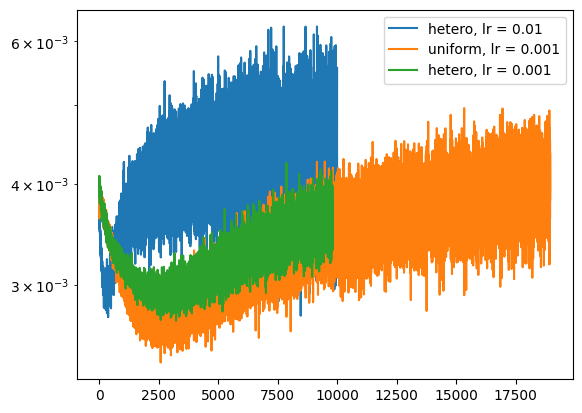

In [11]:
plt.plot(df1['avg_grad_norm'], label='hetero, lr = 0.01')
#plt.plot(df2['avg_grad_norm'], label='uniform, lr = 0.01')
plt.plot(df3['avg_grad_norm'], label='uniform, lr = 0.001')
plt.plot(df4['avg_grad_norm'], label='hetero, lr = 0.001')
plt.yscale('log')
plt.legend()
plt.show()

### 复现

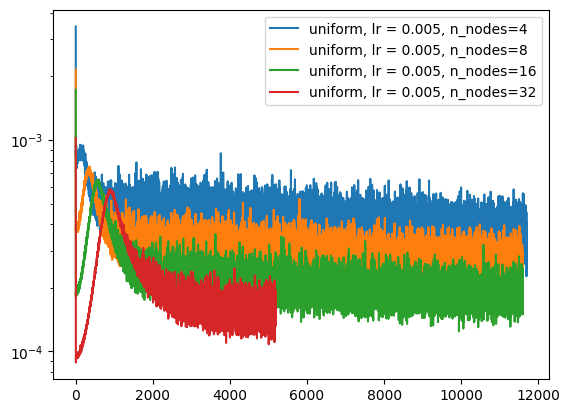

In [12]:
df1 = pd.read_csv('./test_mnist/grad_norm_复现_Exp_test,hetero=False, alpha=0.6, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-09.csv')
df2 = pd.read_csv('./test_mnist/grad_norm_复现_Exp_test,hetero=False, alpha=0.6, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-04-09.csv')
df3 = pd.read_csv('./test_mnist/grad_norm_复现_Exp_test,hetero=False, alpha=0.6, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-04-09.csv')
df4 = pd.read_csv('./test_mnist/grad_norm_复现_Exp_test,hetero=False, alpha=0.6, PushPull, lr=0.005, n_nodes=32, batch_size=128, 2025-04-09.csv')

plt.plot(df1['avg_grad_norm'], label='uniform, lr = 0.005, n_nodes=4')
plt.plot(df2['avg_grad_norm'], label='uniform, lr = 0.005, n_nodes=8')
plt.plot(df3['avg_grad_norm'], label='uniform, lr = 0.005, n_nodes=16')
plt.plot(df4['avg_grad_norm'], label='uniform, lr = 0.005, n_nodes=32')
plt.yscale('log')
plt.legend()
plt.show()

### 高异质性, Exp

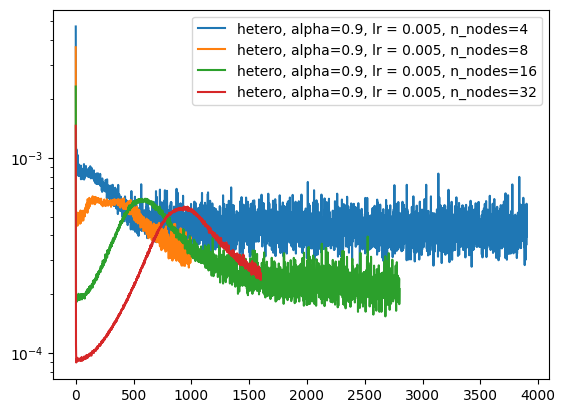

In [16]:
df1 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-09.csv')
df2 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-04-09.csv')
df3 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-04-09.csv')
df4 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=32, batch_size=128, 2025-04-09.csv')

plt.plot(df1['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=4')
plt.plot(df2['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=8')
plt.plot(df3['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=16')
plt.plot(df4['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=32')
plt.yscale('log')
plt.legend()
plt.show()

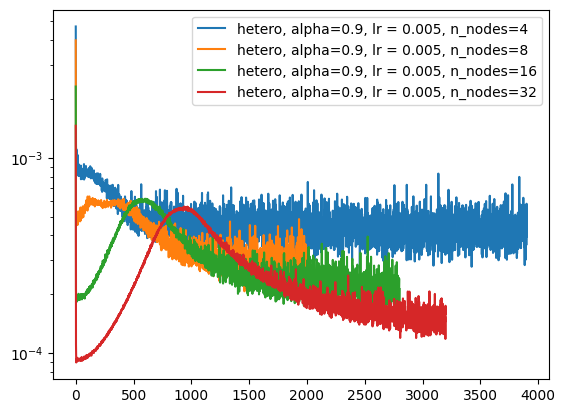

In [17]:
df1 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-09.csv')
df2 = pd.read_csv('./test_mnist/grad_norm_new_Exp_异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-04-09.csv')
df3 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-04-09.csv')
df4 = pd.read_csv('./test_mnist/grad_norm_new_Exp_异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=32, batch_size=128, 2025-04-09.csv')

plt.plot(df1['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=4')
plt.plot(df2['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=8')
plt.plot(df3['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=16')
plt.plot(df4['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=32')
plt.yscale('log')
plt.legend()
plt.show()

In [1]:
# # 对应的实验代码
# lr = 5e-3
# num_epochs = 100
# bs = 128
# alpha = 10
# use_hetero=True
# remark="Exp_异质性",

# n=4
# A, B = get_matrixs_from_exp_graph(n = n, seed=48)
# show_row(A)
# print(A.shape)
# train_track_grad_norm_with_hetero(
#     algorithm="PushPull",
#     lr=lr,
#     A=A,
#     B=B,
#     dataset_name="MNIST",
#     batch_size=bs,
#     num_epochs=num_epochs,
#     remark=remark,
#     alpha = alpha,
#     root = "/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/test_mnist",
#     use_hetero=use_hetero,
# )

# n=8
# A, B = get_matrixs_from_exp_graph(n = n, seed=48)
# show_row(A)
# print(A.shape)
# train_track_grad_norm_with_hetero(
#     algorithm="PushPull",
#     lr=lr,
#     A=A,
#     B=B,
#     dataset_name="MNIST",
#     batch_size=bs,
#     num_epochs=400,
#     remark=remark,
#     alpha = alpha,
#     root = "/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/test_mnist",
#     use_hetero=use_hetero,
# )

# n=16
# A, B = get_matrixs_from_exp_graph(n = n, seed=48)
# show_row(A)
# print(A.shape)
# train_track_grad_norm_with_hetero(
#     algorithm="PushPull",
#     lr=lr,
#     A=A,
#     B=B,
#     dataset_name="MNIST",
#     batch_size=bs,
#     num_epochs=num_epochs*4,
#     remark=remark,
#     alpha = alpha,
#     root = "/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/test_mnist",
#     use_hetero=use_hetero,
# )

# n=32
# A, B = get_matrixs_from_exp_graph(n = n, seed=48)
# show_row(A)
# print(A.shape)
# train_track_grad_norm_with_hetero(
#     algorithm="PushPull",
#     lr=lr,
#     A=A,
#     B=B,
#     dataset_name="MNIST",
#     batch_size=bs,
#     num_epochs=1600,
#     remark=remark,
#     alpha = alpha,
#     root = "/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/test_mnist",
#     use_hetero=use_hetero,
# )

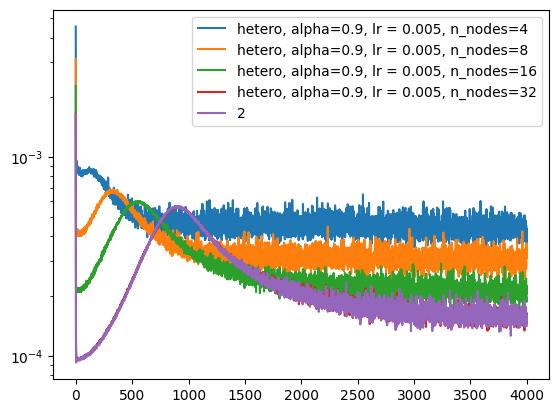

In [8]:
a = 4000

df1 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_10_repeat/exp_n=4_lr=0.005.csv")
df2 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_10_repeat/exp_n=8_lr=0.005.csv")
df3 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_10_repeat/exp_n=16_lr=0.005.csv")
df4 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_10_repeat/exp_n=32_lr=0.005.csv")

df5 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_tmp/Exp_异质性grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=32, batch_size=128, 2025-04-14.csv")
df6 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_tmp/Exp_异质性grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=32, batch_size=128, 2025-04-15.csv")
df7 = (df4+df5+df6)/3

plt.plot(df1['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=4')
plt.plot(df2['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=8')
plt.plot(df3['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=16')
plt.plot(df4['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=32')
#plt.plot(df5['avg_grad_norm'][:a], label='1')
plt.plot(df7['avg_grad_norm'][:a], label='2')
plt.yscale('log')
plt.legend()
plt.show()

22001 32401 2773


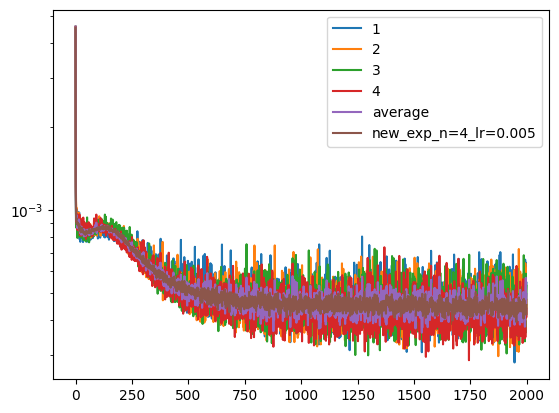

In [11]:
df1 = pd.read_csv("./repeate_test/Test1grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-15.csv")
df2 = pd.read_csv("./repeate_test/Test2grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-15.csv")
df3 = pd.read_csv("./repeate_test/Test3grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-15.csv")
df4 = pd.read_csv("./repeate_test/Test4grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-15.csv")
df5 = (df1+df2+df3+df4)/4
print(len(df1), len(df2), len(df3))
a = 2000

df10 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_10_repeat/new_exp_n=4_lr=0.005.csv")

plt.plot(df1['avg_grad_norm'][:a], label='1')
plt.plot(df2['avg_grad_norm'][:a], label='2')
plt.plot(df3['avg_grad_norm'][:a], label='3')
plt.plot(df4['avg_grad_norm'][:a], label='4')
plt.plot(df5['avg_grad_norm'][:a], label='average')

plt.plot(df10['avg_grad_norm'][:a]/13, label='new_exp_n=4_lr=0.005')

plt.yscale('log')
plt.legend()
plt.show()

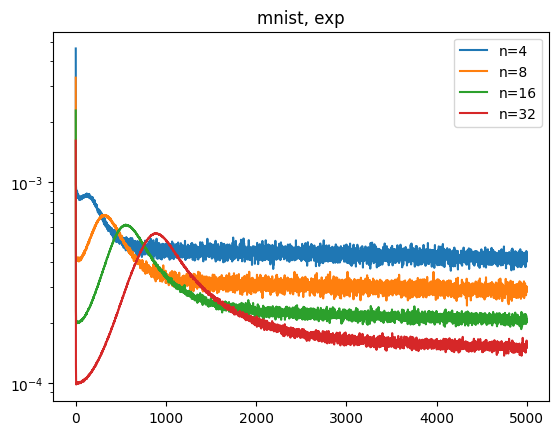

In [2]:
df1 = pd.read_csv('./exp_mnist_10_repeat/for_draw_exp_n=4_lr=0.005.csv')
df2 = pd.read_csv('./exp_mnist_10_repeat/for_draw_exp_n=8_lr=0.005.csv')
df3 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=16_lr=0.005.csv')
df4 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=32_lr=0.005.csv')

a = 5000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=8')
plt.plot(df3['avg_grad_norm'][:a], label='n=16')
plt.plot(df4['avg_grad_norm'][:a], label='n=32')
plt.yscale('log')
plt.title("mnist, exp")
plt.legend()
plt.show()

n=4 和 n=8 都需要跑满20次.

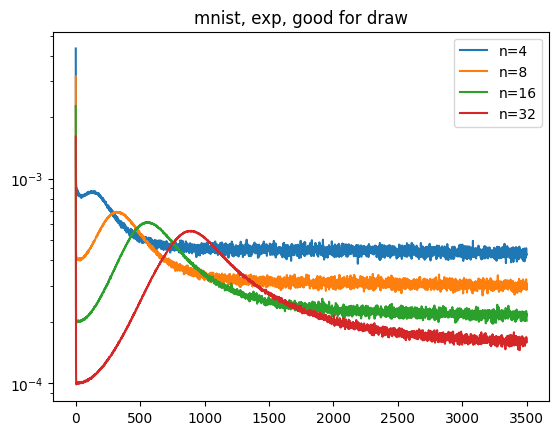

In [2]:
df1 = pd.read_csv('./exp_mnist_10_repeat/brand_new_for_draw_exp_n=4_lr=0.005.csv')
df2 = pd.read_csv('./exp_mnist_10_repeat/brand_new_for_draw_exp_n=8_lr=0.005.csv')
df3 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=16_lr=0.005.csv')
df4 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=32_lr=0.005.csv')

a = 3500

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=8')
plt.plot(df3['avg_grad_norm'][:a], label='n=16')
plt.plot(df4['avg_grad_norm'][:a], label='n=32')
plt.yscale('log')
plt.title("mnist, exp, good for draw")
plt.legend()
plt.show()

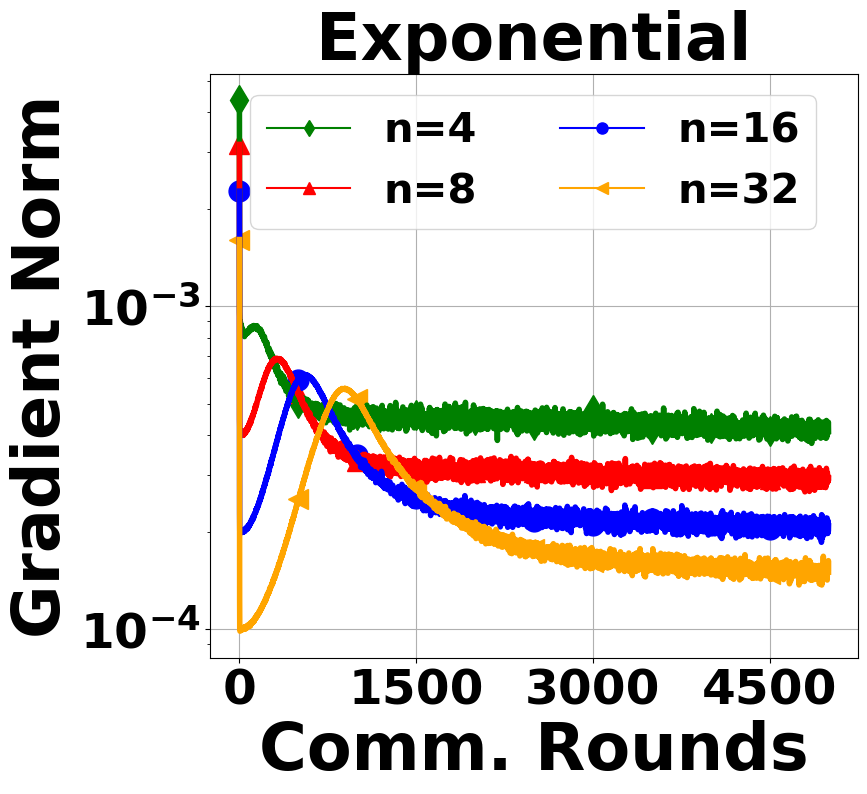

In [11]:
s=5000

df1 = pd.read_csv('./exp_mnist_10_repeat/brand_new_for_draw_exp_n=4_lr=0.005.csv')
df2 = pd.read_csv('./exp_mnist_10_repeat/brand_new_for_draw_exp_n=8_lr=0.005.csv')
df3 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=16_lr=0.005.csv')
df4 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=32_lr=0.005.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=16",
    "n=32",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/exp_mnist.pdf", ylabel="Gradient Norm")

### mnist grid

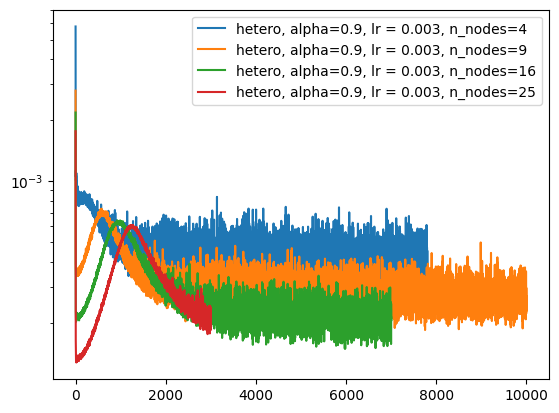

In [2]:
df1 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-13.csv")
df2 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.003, n_nodes=9, batch_size=128, 2025-04-13.csv")
df3 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.003, n_nodes=16, batch_size=128, 2025-04-13.csv")
df4 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.003, n_nodes=25, batch_size=128, 2025-04-13.csv")

plt.plot(df1['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.003, n_nodes=4')
plt.plot(df2['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.003, n_nodes=9')
plt.plot(df3['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.003, n_nodes=16')
plt.plot(df4['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.003, n_nodes=25')
plt.yscale('log')
plt.legend()
plt.show()

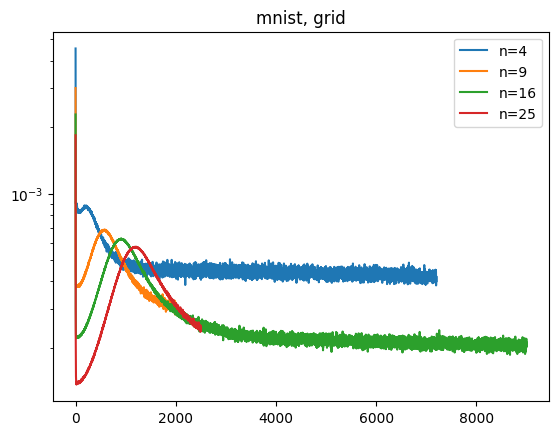

In [2]:
df1 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=4_lr=0.003.csv')
df2 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=9_lr=0.003.csv')
df3 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=16_lr=0.003.csv')
df4 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=25_lr=0.003.csv')

a = 40000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=9')
plt.plot(df3['avg_grad_norm'][:a], label='n=16')
plt.plot(df4['avg_grad_norm'][:a], label='n=25')
plt.yscale('log')
plt.title("mnist, grid")
plt.legend()
plt.show()

n=9 和 n=25还需要再加一倍的epoch

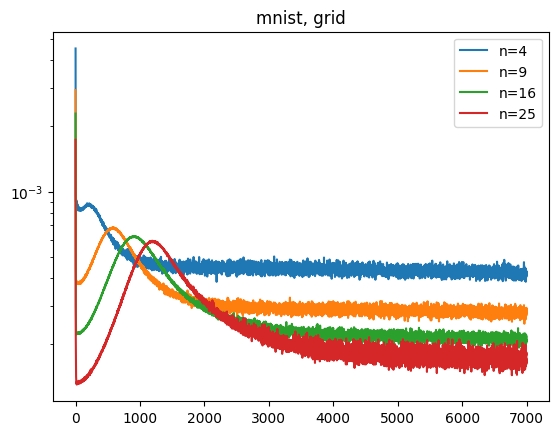

In [3]:
df1 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=4_lr=0.003.csv')
df2 = pd.read_csv('./grid_mnist_repeat/brand_new_for_draw_exp_n=9_lr=0.003.csv')
df3 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=16_lr=0.003.csv')
df4 = pd.read_csv('./grid_mnist_repeat/brand_new_for_draw_exp_n=25_lr=0.003.csv')

a = 7000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=9')
plt.plot(df3['avg_grad_norm'][:a], label='n=16')
plt.plot(df4['avg_grad_norm'][:a], label='n=25')
plt.yscale('log')
plt.title("mnist, grid")
plt.legend()
plt.show()

grid的n=25看起来还需要重复一些

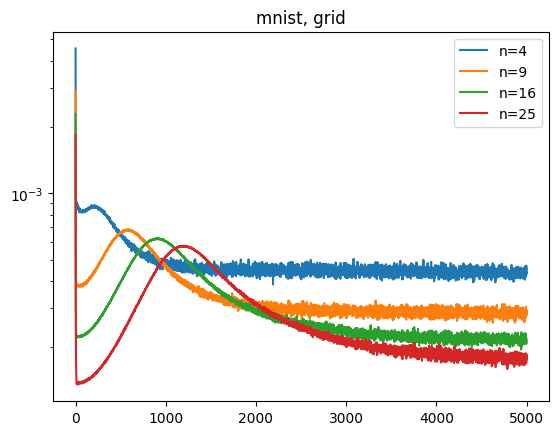

In [10]:
df1 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=4_lr=0.003.csv')
df2 = pd.read_csv('./grid_mnist_repeat/brand_new_for_draw_exp_n=9_lr=0.003.csv')
df3 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=16_lr=0.003.csv')
df4 = pd.read_csv('./grid_mnist_repeat/new_brand_new_for_draw_exp_n=25_lr=0.003.csv')
# df5 = pd.read_csv('./grid_mnist_repeat/brand_new_for_draw_exp_n=25_lr=0.003.csv')
# df6 = (df4+df5)/2

a = 5000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=9')
plt.plot(df3['avg_grad_norm'][:a], label='n=16')
plt.plot(df4['avg_grad_norm'][:a], label='n=25')
plt.yscale('log')
plt.title("mnist, grid")
plt.legend()
plt.show()

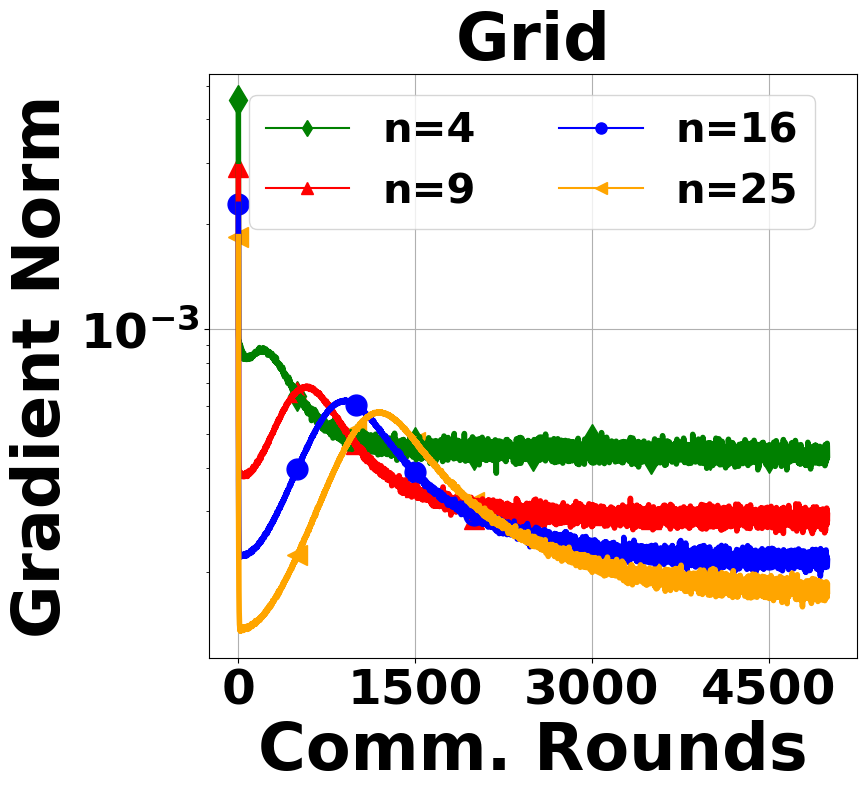

In [15]:
s=5000

df1 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=4_lr=0.003.csv')
df2 = pd.read_csv('./grid_mnist_repeat/brand_new_for_draw_exp_n=9_lr=0.003.csv')
df3 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=16_lr=0.003.csv')
df4 = pd.read_csv('./grid_mnist_repeat/new_brand_new_for_draw_exp_n=25_lr=0.003.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=4",
    "n=9",
    "n=16",
    "n=25",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/grid_mnist.pdf", ylabel="Gradient Norm")

#### 测试average

In [40]:
df1 = pd.read_csv('/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/firstgrad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-14.csv')
df2 = pd.read_csv('/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/secondgrad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-14.csv')

In [50]:
df3 = (df1+df2)/2
df4 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/third grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-14.csv")
df5 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/FOURTH grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-14.csv")
df7 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/newnewnew grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-14.csv")

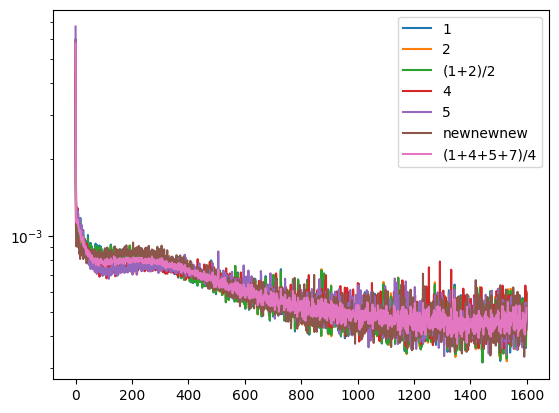

In [53]:
a = 1600

df6 = (df1[:a]+df4[:a]+df5[:a]+df7[:a])/4

plt.plot(df1['avg_grad_norm'][:a], label='1')
plt.plot(df2['avg_grad_norm'][:a], label='2')
plt.plot(df3['avg_grad_norm'][:a], label='(1+2)/2')
plt.plot(df4['avg_grad_norm'][:a], label='4')
plt.plot(df5['avg_grad_norm'][:a], label='5')   
plt.plot(df7['avg_grad_norm'][:a], label='newnewnew')
plt.plot(df6['avg_grad_norm'][:a], label='(1+4+5+7)/4')
plt.yscale('log')
plt.legend()
plt.show()

说明average好像作用不大? 可能是dataloader根本没有随机?

确实是dataloader随机性的问题..

### mnist ring

In [ ]:
# n=16
# A, B = generate_ring_matrices(n = n, seed=42)
# show_row(A)

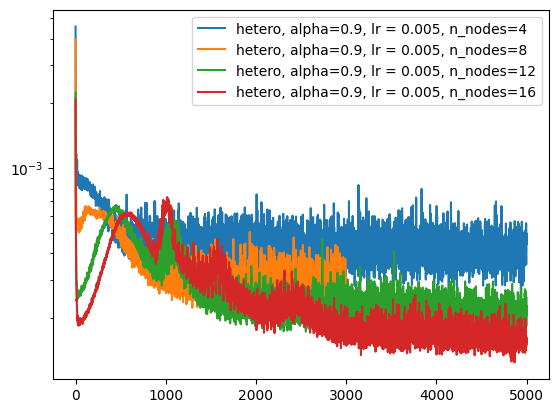

In [9]:
a = 5000

df1 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/ring_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-13.csv")
df2 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/ring_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-04-13.csv")
df3 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/ring_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=12, batch_size=128, 2025-04-13.csv")
df4 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/ring_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-04-13.csv")

plt.plot(df1['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=4')
plt.plot(df2['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=8')
plt.plot(df3['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=12')
plt.plot(df4['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=16')
plt.yscale('log')
plt.legend()
plt.show()

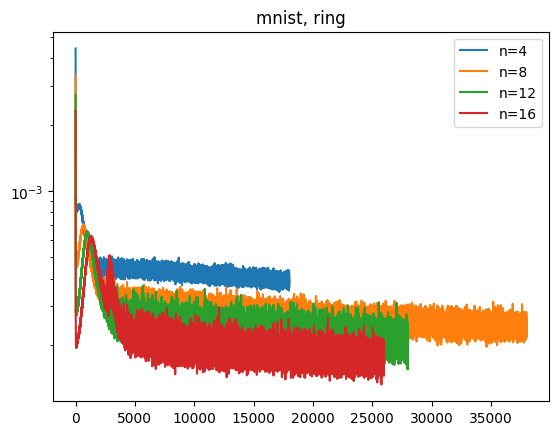

In [6]:
df1 = pd.read_csv('./ring_mnist_repeate/new_for_draw_exp_n=4_lr=0.002.csv')
df2 = pd.read_csv('./ring_mnist_repeate/new_for_draw_exp_n=8_lr=0.002.csv')
df3 = pd.read_csv('./ring_mnist_repeate/new_for_draw_exp_n=12_lr=0.002.csv')
df4 = pd.read_csv('./ring_mnist_repeate/new_for_draw_exp_n=16_lr=0.002.csv')

a = 100000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=8')
plt.plot(df3['avg_grad_norm'][:a], label='n=12')
plt.plot(df4['avg_grad_norm'][:a], label='n=16')
plt.yscale('log')
plt.title("mnist, ring")
plt.legend()
plt.show()

还没有跑完就断电了，之后继续跑完

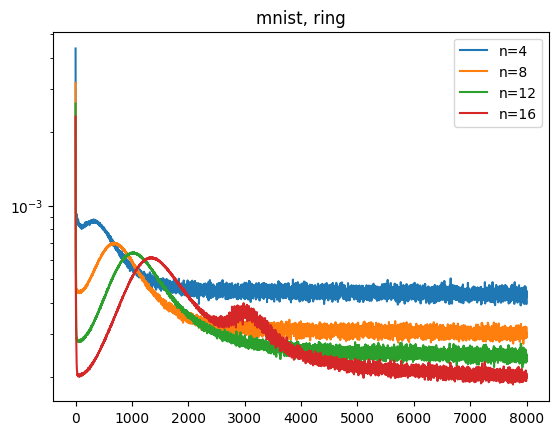

In [8]:
df1 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=4_lr=0.002.csv')
df2 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=8_lr=0.002.csv')
df3 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=12_lr=0.002.csv')
df4 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=16_lr=0.002.csv')

a = 8000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=8')
plt.plot(df3['avg_grad_norm'][:a], label='n=12')
plt.plot(df4['avg_grad_norm'][:a], label='n=16')
plt.yscale('log')
plt.title("mnist, ring")
plt.legend()
plt.show()

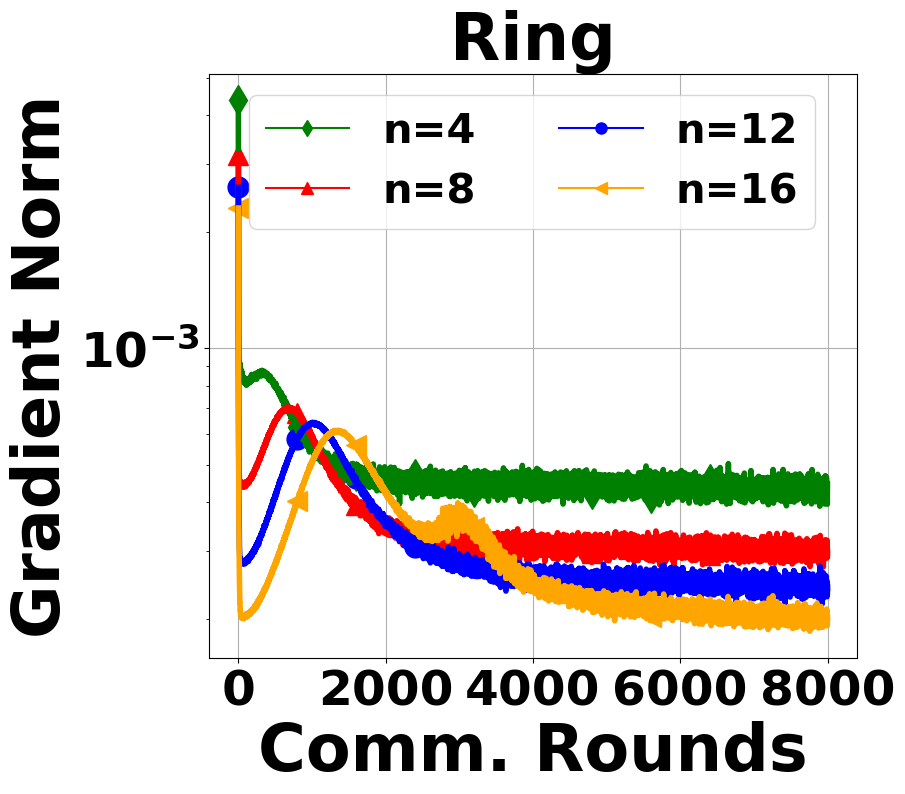

In [22]:
s=8000

df1 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=4_lr=0.002.csv')
df2 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=8_lr=0.002.csv')
df3 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=12_lr=0.002.csv')
df4 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=16_lr=0.002.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=12",
    "n=16",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/ring_mnist.pdf", ylabel="Gradient Norm")

### 哎，CIFAR10跑不动, 可以先在MNIST把剩下的3个图先跑了: 几何图, nearest neighbor, random graph(每条边有p的概率存在, p=3/n~1/3)

### 随机图

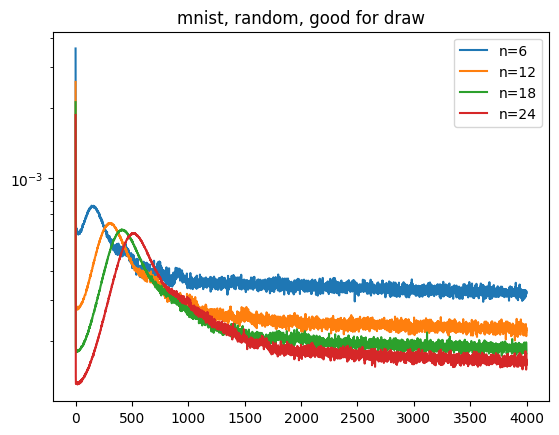

In [7]:
df1 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=6_lr=0.007.csv')
df2 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df3 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=18_lr=0.007.csv')
df4 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=24_lr=0.007.csv')

a = 4000

plt.plot(df1['avg_grad_norm'][:a], label='n=6')
plt.plot(df2['avg_grad_norm'][:a], label='n=12')
plt.plot(df3['avg_grad_norm'][:a], label='n=18')
plt.plot(df4['avg_grad_norm'][:a], label='n=24')
plt.yscale('log')
plt.title("mnist, random, good for draw")
plt.legend()
plt.show()

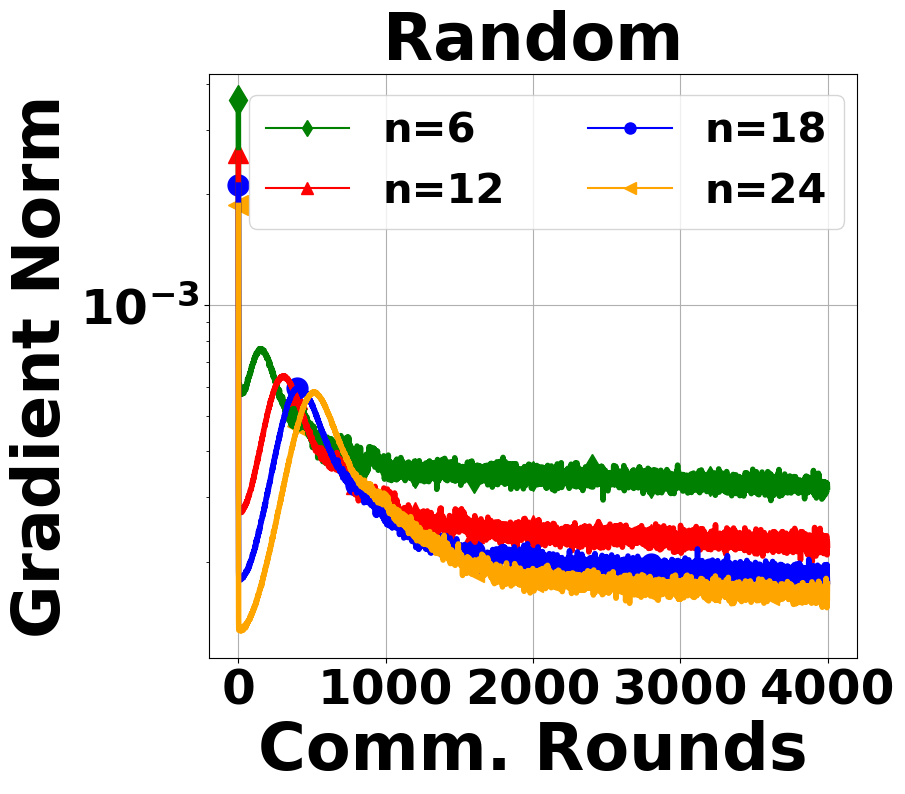

In [24]:
s=4000

df1 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=6_lr=0.007.csv')
df2 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df3 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=18_lr=0.007.csv')
df4 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=24_lr=0.007.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=6",
    "n=12",
    "n=18",
    "n=24",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/random_mnist.pdf", ylabel="Gradient Norm")

### 几何图(k=5)

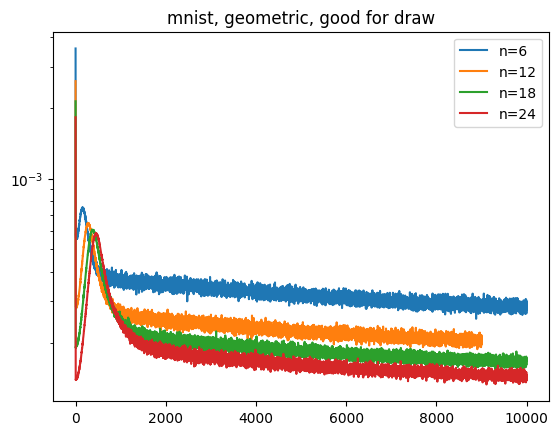

In [3]:
df1 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=6_lr=0.007.csv')
df2 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df3 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=18_lr=0.007.csv')
df4 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=24_lr=0.007.csv')

a = 10000

plt.plot(df1['avg_grad_norm'][:a], label='n=6')
plt.plot(df2['avg_grad_norm'][:a], label='n=12')
plt.plot(df3['avg_grad_norm'][:a], label='n=18')
plt.plot(df4['avg_grad_norm'][:a], label='n=24')
plt.yscale('log')
plt.title("mnist, geometric, good for draw")
plt.legend()
plt.show()

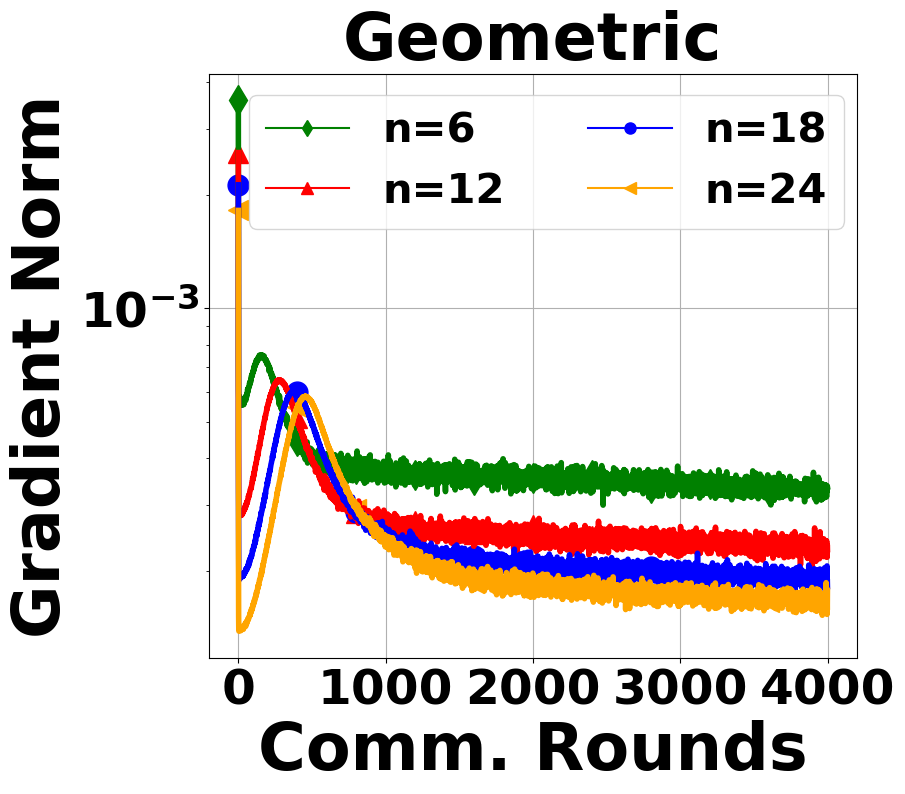

In [29]:
s=4000

df1 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=6_lr=0.007.csv')
df2 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df3 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=18_lr=0.007.csv')
df4 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=24_lr=0.007.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=6",
    "n=12",
    "n=18",
    "n=24",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/geometric_mnist.pdf", ylabel="Gradient Norm")

### 临近图

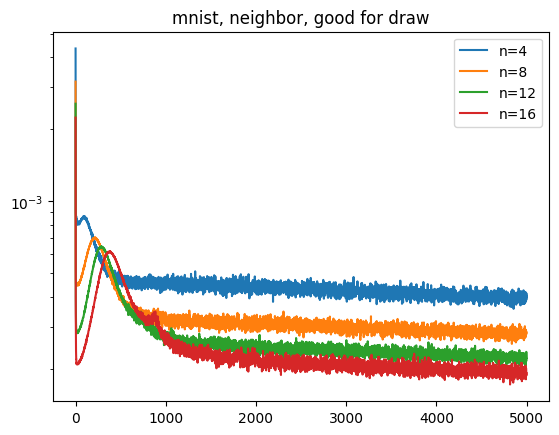

In [3]:
df1 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=4_lr=0.007.csv')
df2 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=8_lr=0.007.csv')
df3 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df4 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=16_lr=0.007.csv')

a = 5000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=8')
plt.plot(df3['avg_grad_norm'][:a], label='n=12')
plt.plot(df4['avg_grad_norm'][:a], label='n=16')
plt.yscale('log')
plt.title("mnist, neighbor, good for draw")
plt.legend()
plt.show()

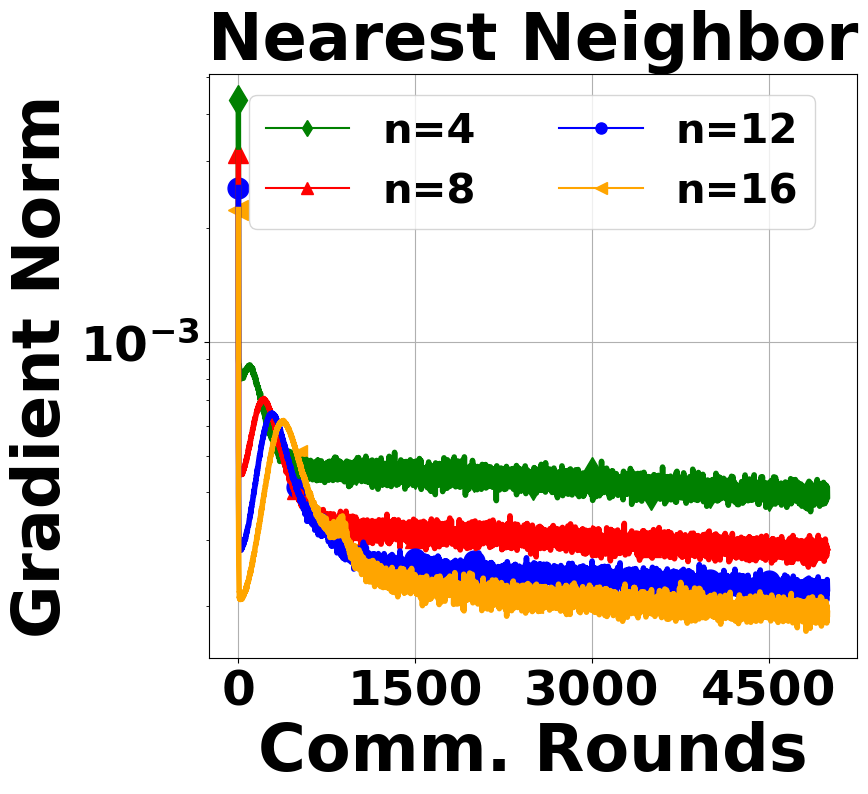

In [27]:
s=5000

df1 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=4_lr=0.007.csv')
df2 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=8_lr=0.007.csv')
df3 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df4 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=16_lr=0.007.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=12",
    "n=16",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/neighbor_mnist.pdf", ylabel="Gradient Norm")

### 接下来是CIFAR10的实验

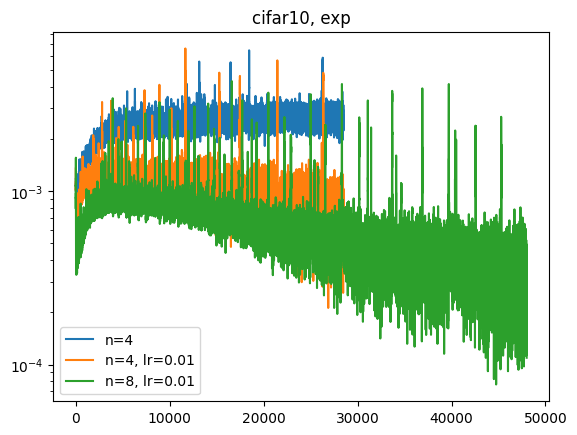

In [2]:
df1 = pd.read_csv('./EXP_CIFAR10_repeat/test_exp_n=4_lr=0.001.csv')
df2 = pd.read_csv('./EXP_CIFAR10_repeat/test_exp_n=4_lr=0.01.csv')
df3 = pd.read_csv('./EXP_CIFAR10_repeat/test_exp_n=8_lr=0.01.csv')

a = 150000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=4, lr=0.01')
plt.plot(df3['avg_grad_norm'][:a], label='n=8, lr=0.01')
plt.yscale('log')
plt.title("cifar10, exp")
plt.legend()
plt.show()

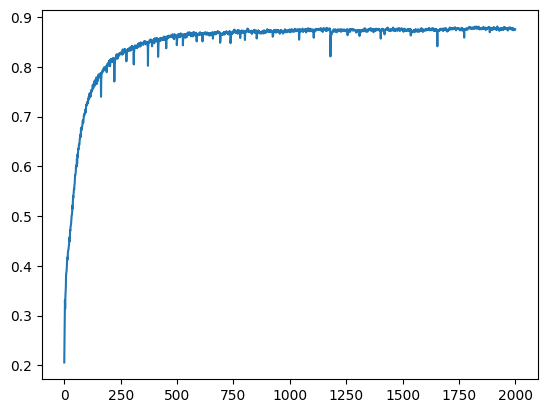

In [4]:
df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/EXP_CIFAR10_tmp/newnewhetero=True, alpha=0.9, PushPull, lr=0.01, n_nodes=8, batch_size=128, 2025-04-27.csv")
plt.plot(df["test_accuracy(average)"][:], label='test_accuracy(average)')
plt.show()

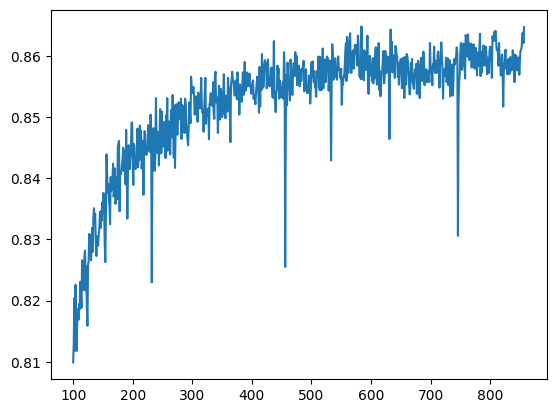

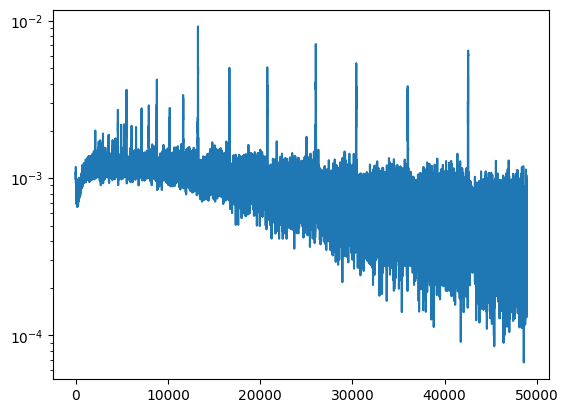

In [5]:
df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/EXP_CIFAR10_tmp/repeat_20hetero=True, alpha=0.9, PushPull, lr=0.01, n_nodes=4, batch_size=128, 2025-05-04.csv")
plt.plot(df["test_accuracy(average)"][100:], label='test_accuracy(average)')
plt.show()

df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/EXP_CIFAR10_tmp/repeat_20grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.01, n_nodes=4, batch_size=128, 2025-05-04.csv")
plt.plot(df["avg_grad_norm"][1:], label='avg_grad_norm')
plt.yscale('log')
plt.show()